In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
# import sklearn

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk") # talk context is good for RISE presentations

Populating the interactive namespace from numpy and matplotlib


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

In [63]:
# load imdb data
df = pd.read_csv('./data/movies.csv')
del df['Unnamed: 0']
df.head()

,Title,WorldWideGross,Budget,ReleaseDate,Certificate,Runtime,Score,ScoreReviews,ImdbReviews,CriticReviews,MetaScore,Directors,Writers,Stars,Genres,Country,Locations,Companies
0,The Shawshank Redemption,2.881729e+07,25000000.0,1995-03-10,13+,142.0,9.3,2500000,9700,193,80.0,['Frank Darabont'],"['Stephen King', 'Frank Darabont']","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Drama'],United States,"['127A Smithfield Road, Frederiksted, Virgin I...",['Castle Rock Entertainment']
1,The Godfather,2.461210e+08,6000000.0,1973-10-01,18+,175.0,9.2,1700000,4700,269,100.0,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']","['Marlon Brando', 'Al Pacino', 'James Caan']","['Crime', 'Drama']",United States,"[""Forza d'Agrò, Messina, Sicily, Italy""]","['Paramount Pictures', 'Alfran Productions']"
2,The Godfather: Part II,4.803578e+07,13000000.0,1974-12-18,18+,202.0,9.0,1200000,1200,190,90.0,['Francis Ford Coppola'],"['Francis Ford Coppola', 'Mario Puzo']","['Al Pacino', 'Robert De Niro', 'Robert Duvall']","['Crime', 'Drama']",United States,"['Kaiser Estate, 4000 W Lake Blvd, Homewood, L...","['Paramount Pictures', 'The Coppola Company', ..."
3,The Dark Knight,1.005974e+09,185000000.0,2008-07-25,16+,152.0,9.0,2500000,7700,433,84.0,['Christopher Nolan'],"['Writers', 'Jonathan Nolan', 'Christopher Nol...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['Action', 'Crime', 'Drama', 'Thriller']",United States,"['Chicago, Illinois, USA']","['Warner Bros.', 'Legendary Entertainment', 'S..."
4,12 Angry Men,9.550000e+02,350000.0,1960-04-01,15+,96.0,9.0,740000,1800,160,96.0,['Sidney Lumet'],['Reginald Rose'],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']","['Crime', 'Drama']",United States,['New York County Courthouse - 60 Centre Stree...,['Orion-Nova Productions']


In [64]:
df.isnull().any()

Title             False
WorldWideGross     True
Budget             True
ReleaseDate       False
Certificate       False
Runtime            True
Score             False
ScoreReviews      False
ImdbReviews       False
CriticReviews     False
MetaScore          True
Directors         False
Writers           False
Stars             False
Genres            False
Country           False
Locations          True
Companies         False
dtype: bool

In [24]:
df.fillna(value=0, axis=1, inplace=True)
df.shape

(250, 18)

<AxesSubplot:>

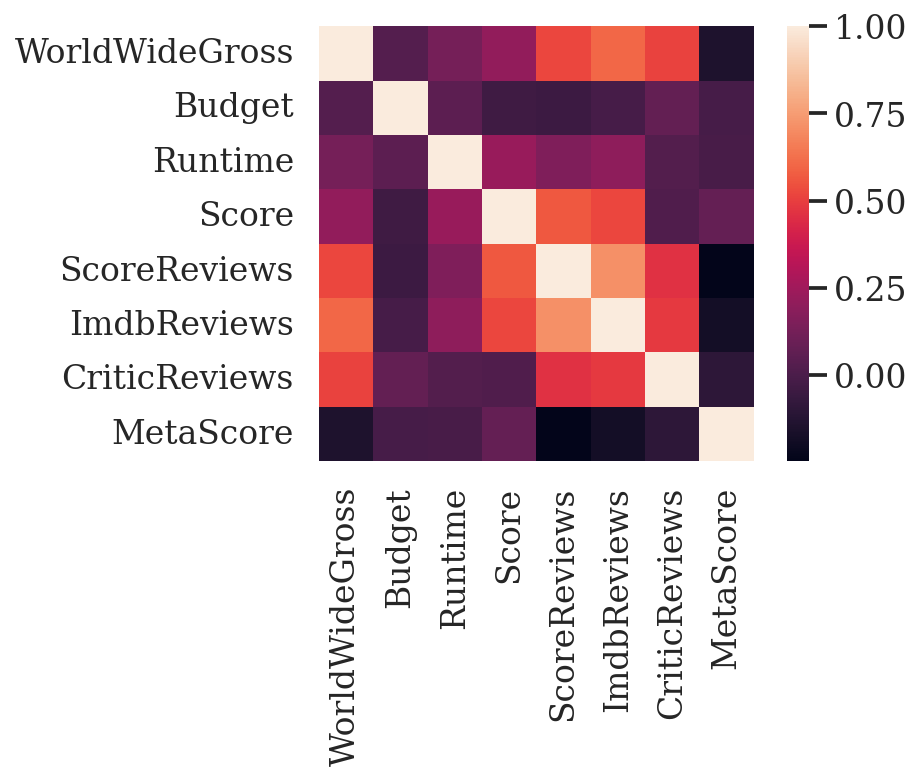

In [65]:
sns.heatmap(df.corr(), vmax=1, square=True)

In [66]:
df["Budget"].max()
df["Title"][df["WorldWideGross"]==df["WorldWideGross"].max()]

74    Avengers: Endgame
Name: Title, dtype: object

In [45]:
df["Budget"] = df["Budget"][df["Budget"]<3_000_000]

/home/monder/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorldWideGross'>

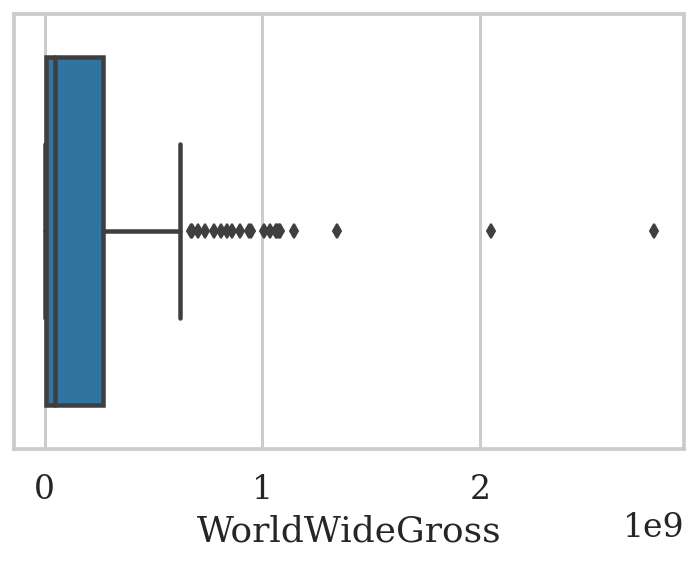

In [67]:
sns.boxplot(df['WorldWideGross'])

In [70]:
print(np.where(df['WorldWideGross']>1_000_000_000)) # Seems fair.

(array([  3,   6,  37,  61,  68,  71,  74, 120, 167, 213]),)


/home/monder/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Budget'>

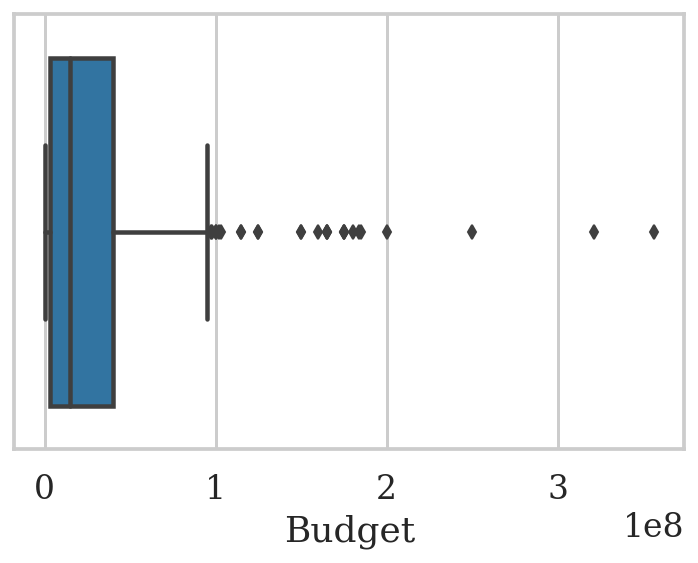

In [100]:
sns.boxplot(df['Budget'])

In [98]:
print(np.where(df['Budget']>300_000_000)) # Seems not fair.

(array([61, 74]),)


In [97]:
df['Budget'][df['Budget']>360_000_000] = df['Budget'][df['Budget']<360_000_000].mean()

/tmp/ipykernel_38056/3542417726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget'][df['Budget']>360_000_000] = df['Budget'][df['Budget']<360_000_000].mean()


0      The Shawshank Redemption
1                 The Godfather
2        The Godfather: Part II
3               The Dark Knight
4                  12 Angry Men
                 ...           
245         Le notti di Cabiria
246          The Princess Bride
247                Paris, Texas
248       Trois couleurs: Rouge
249                    Ratsasan
Name: Title, Length: 250, dtype: object